# CA3

### Imports

In [129]:

import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd
import numpy as np
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder



### Reading data

In [130]:
raw_train = pd.read_csv('train.csv', index_col=0)
test_data = pd.read_csv('test.csv', index_col=0)

raw_train

,index,AFP (ng/mL),ALP (U/L),ALT (U/L),AST (U/L),Age,Albumin (g/dL),Alcohol_Use (yes/no),Bilirubin (mg/dL),CRP (mg/L),...,Serum_Creatinine (mg/dL),Serum_Iron (μg/dL),Serum_Lactate (mmol/L),Serum_Urea (mg/dL),Serum_Zinc (μg/dL),TIBC (μg/dL),Transferrin_Saturation (%),WBC (10^9/L),pH,Diagnosis
0,1124,13.571425,1653.138489,40.405592,45.598427,4,4.477126,yes,0.541997,1.002121,...,2.569954,97.242495,2.923385,26.696110,96.124260,315.439318,30.827639,4.180007,6.163600,Healthy
1,1188,13.649342,1940.518305,21.336986,34.064095,55,3.190724,yes,1.199063,0.582746,...,3.024642,128.597676,2.719966,23.021218,50.554650,268.492437,47.896200,4.590995,5.244266,Cirrhosis
2,530,10.898943,1557.369920,29.665496,16.044488,30,4.506351,no,0.740952,1.670375,...,2.219844,98.026938,3.267757,20.123808,82.900681,312.107620,31.408057,4.524580,5.769592,Healthy
3,686,13.872275,1273.840525,142.418649,64.204257,0,3.665655,yes,1.939879,1.220646,...,1.704282,63.105133,1.937625,36.436855,72.360010,182.506010,34.577016,4.234483,5.982228,Drug-induced Liver Injury
4,296,10.102457,1461.622515,22.437303,23.940205,59,4.005109,no,0.769535,0.139863,...,2.656926,89.966713,1.979801,20.036074,63.216136,212.261519,42.384844,4.306892,4.837404,Healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,664,13.086307,1663.149063,94.844911,81.525503,82,3.893254,yes,1.514709,4.102990,...,2.510571,71.561815,3.255364,13.806666,74.751383,331.761651,21.570249,4.239866,6.525677,Hepatitis
699,1227,12.425079,1580.772607,19.152473,29.765881,8,4.434494,yes,2.497997,3.827726,...,3.267194,139.135093,3.741368,24.133150,51.577230,266.947184,52.120832,4.374619,6.071335,Cirrhosis
700,1019,12.887508,1164.383286,116.825787,71.610295,14,4.002324,no,1.760204,2.456043,...,3.056218,141.278410,2.945887,13.363649,95.869655,260.085180,54.320054,4.369082,5.059313,Hepatitis
701,767,8.947665,1178.449705,7.818343,46.739457,2,3.866326,no,0.552524,4.907847,...,2.322946,112.506385,2.180009,15.892570,72.641767,344.926350,32.617510,4.249171,6.546267,Healthy


### Data exploration and visualisation

In [131]:
# 
describe = raw_train.describe()
describe 

,index,AFP (ng/mL),ALP (U/L),ALT (U/L),AST (U/L),Age,Albumin (g/dL),Bilirubin (mg/dL),CRP (mg/L),Fibroscan (kPa),...,Serum_Copper (μg/dL),Serum_Creatinine (mg/dL),Serum_Iron (μg/dL),Serum_Lactate (mmol/L),Serum_Urea (mg/dL),Serum_Zinc (μg/dL),TIBC (μg/dL),Transferrin_Saturation (%),WBC (10^9/L),pH
count,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,...,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000
mean,709.655761,23.804227,1624.337402,58.262199,46.855946,27.206259,4.155568,1.056841,2.021190,8.899789,...,105.754889,2.901900,105.901892,2.867523,21.440875,78.021500,288.708468,38.220427,5.000254,6.072044
std,412.801775,54.938736,517.367426,36.372428,30.838523,23.632185,0.432317,0.617223,2.638333,3.822241,...,26.159403,0.647559,33.699054,0.936050,6.946169,15.826557,54.223207,15.438507,2.025527,0.642783
min,2.000000,-22.836893,546.609117,-14.313734,-16.215535,0.000000,2.625845,0.130291,0.075035,2.323530,...,30.099096,1.525736,8.328732,0.711997,7.641927,34.170231,102.896996,2.496813,4.129884,4.416868
25%,350.000000,8.029213,1229.735749,29.939330,24.163363,5.000000,3.880943,0.634089,0.651623,6.273365,...,88.632128,2.441051,84.737590,2.211484,16.422281,66.617374,248.832647,28.598082,4.243197,5.724293
50%,722.000000,10.195074,1553.771408,48.857238,38.720602,23.000000,4.166995,0.801903,1.238123,7.966800,...,102.842960,2.844621,104.670558,2.700933,20.668951,78.024893,290.278094,35.617342,4.331605,6.085019
75%,1065.500000,12.656547,1931.433883,84.583900,70.023374,45.000000,4.437957,1.396853,2.449216,10.588808,...,118.722674,3.275906,125.937089,3.393898,25.096926,88.452369,326.508987,46.630605,4.762898,6.485114
max,1435.000000,449.925304,3769.332343,178.226798,154.173314,86.000000,5.447072,3.712815,32.356076,26.691648,...,227.617474,5.729147,223.915730,8.010270,51.875943,120.279580,484.581225,156.858874,21.195702,8.368522


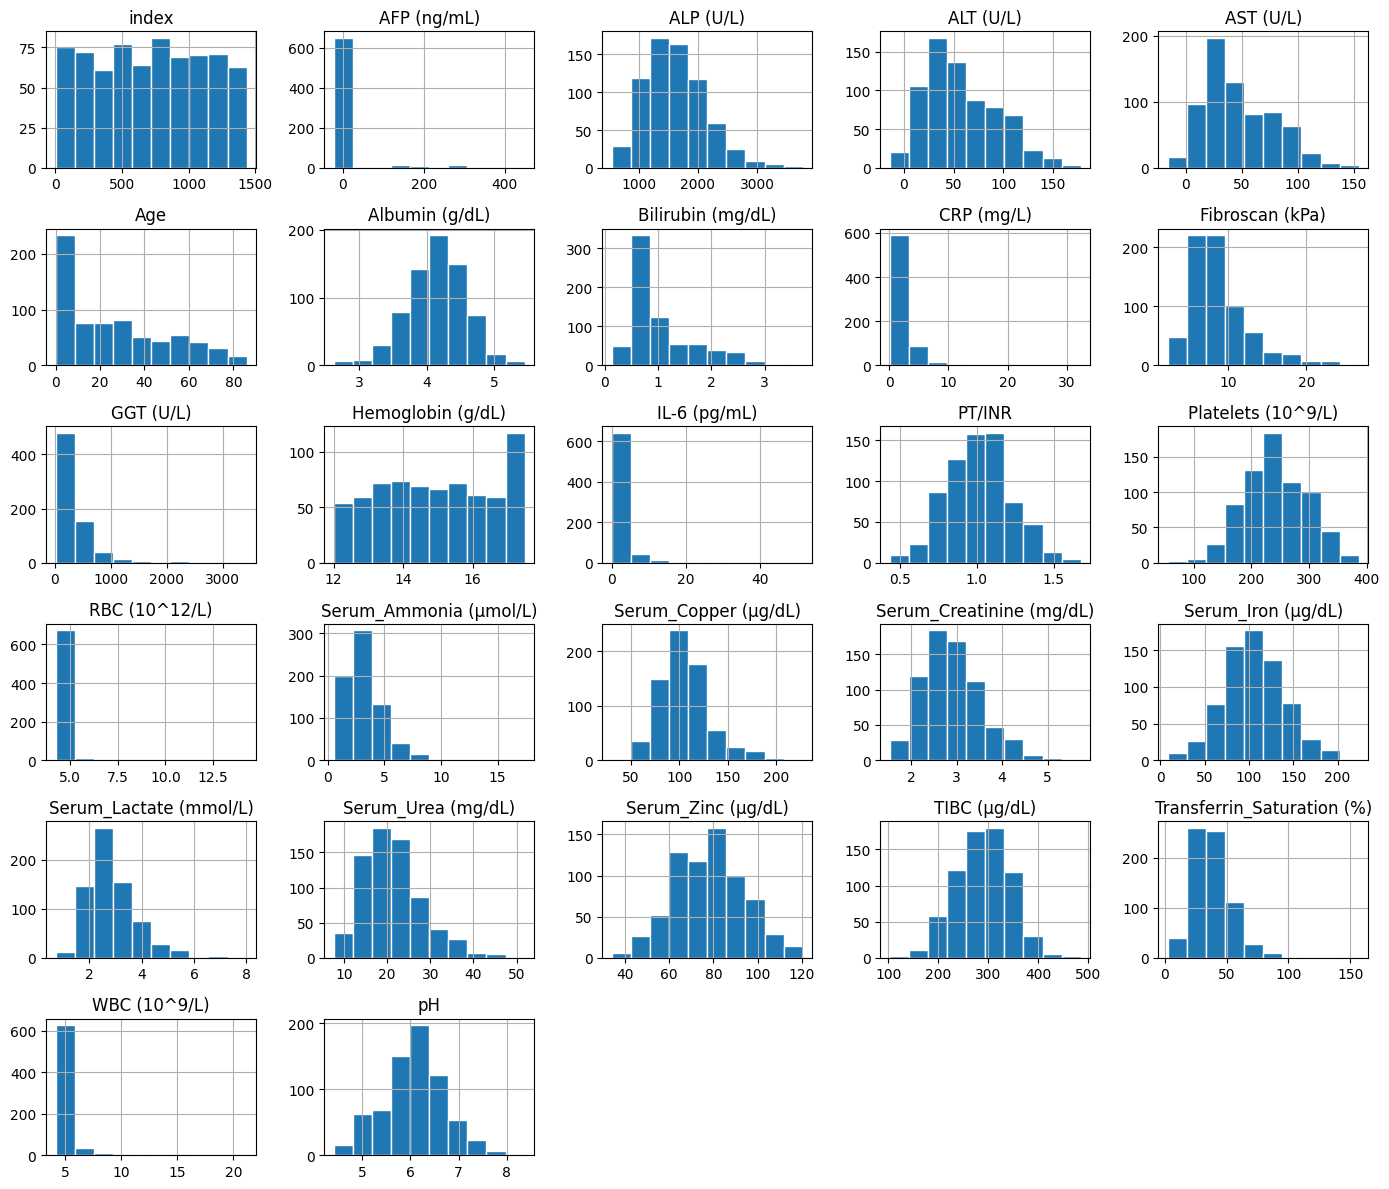

In [132]:
# Histogram 
raw_train.hist(figsize=(14,12) , edgecolor="white") # edgecolor makes it look nicer 
plt.tight_layout()
plt.show()

In [133]:
# Pairplot
#sns.pairplot(data=raw_train, hue = 'Diagnosis')
#plt.show()

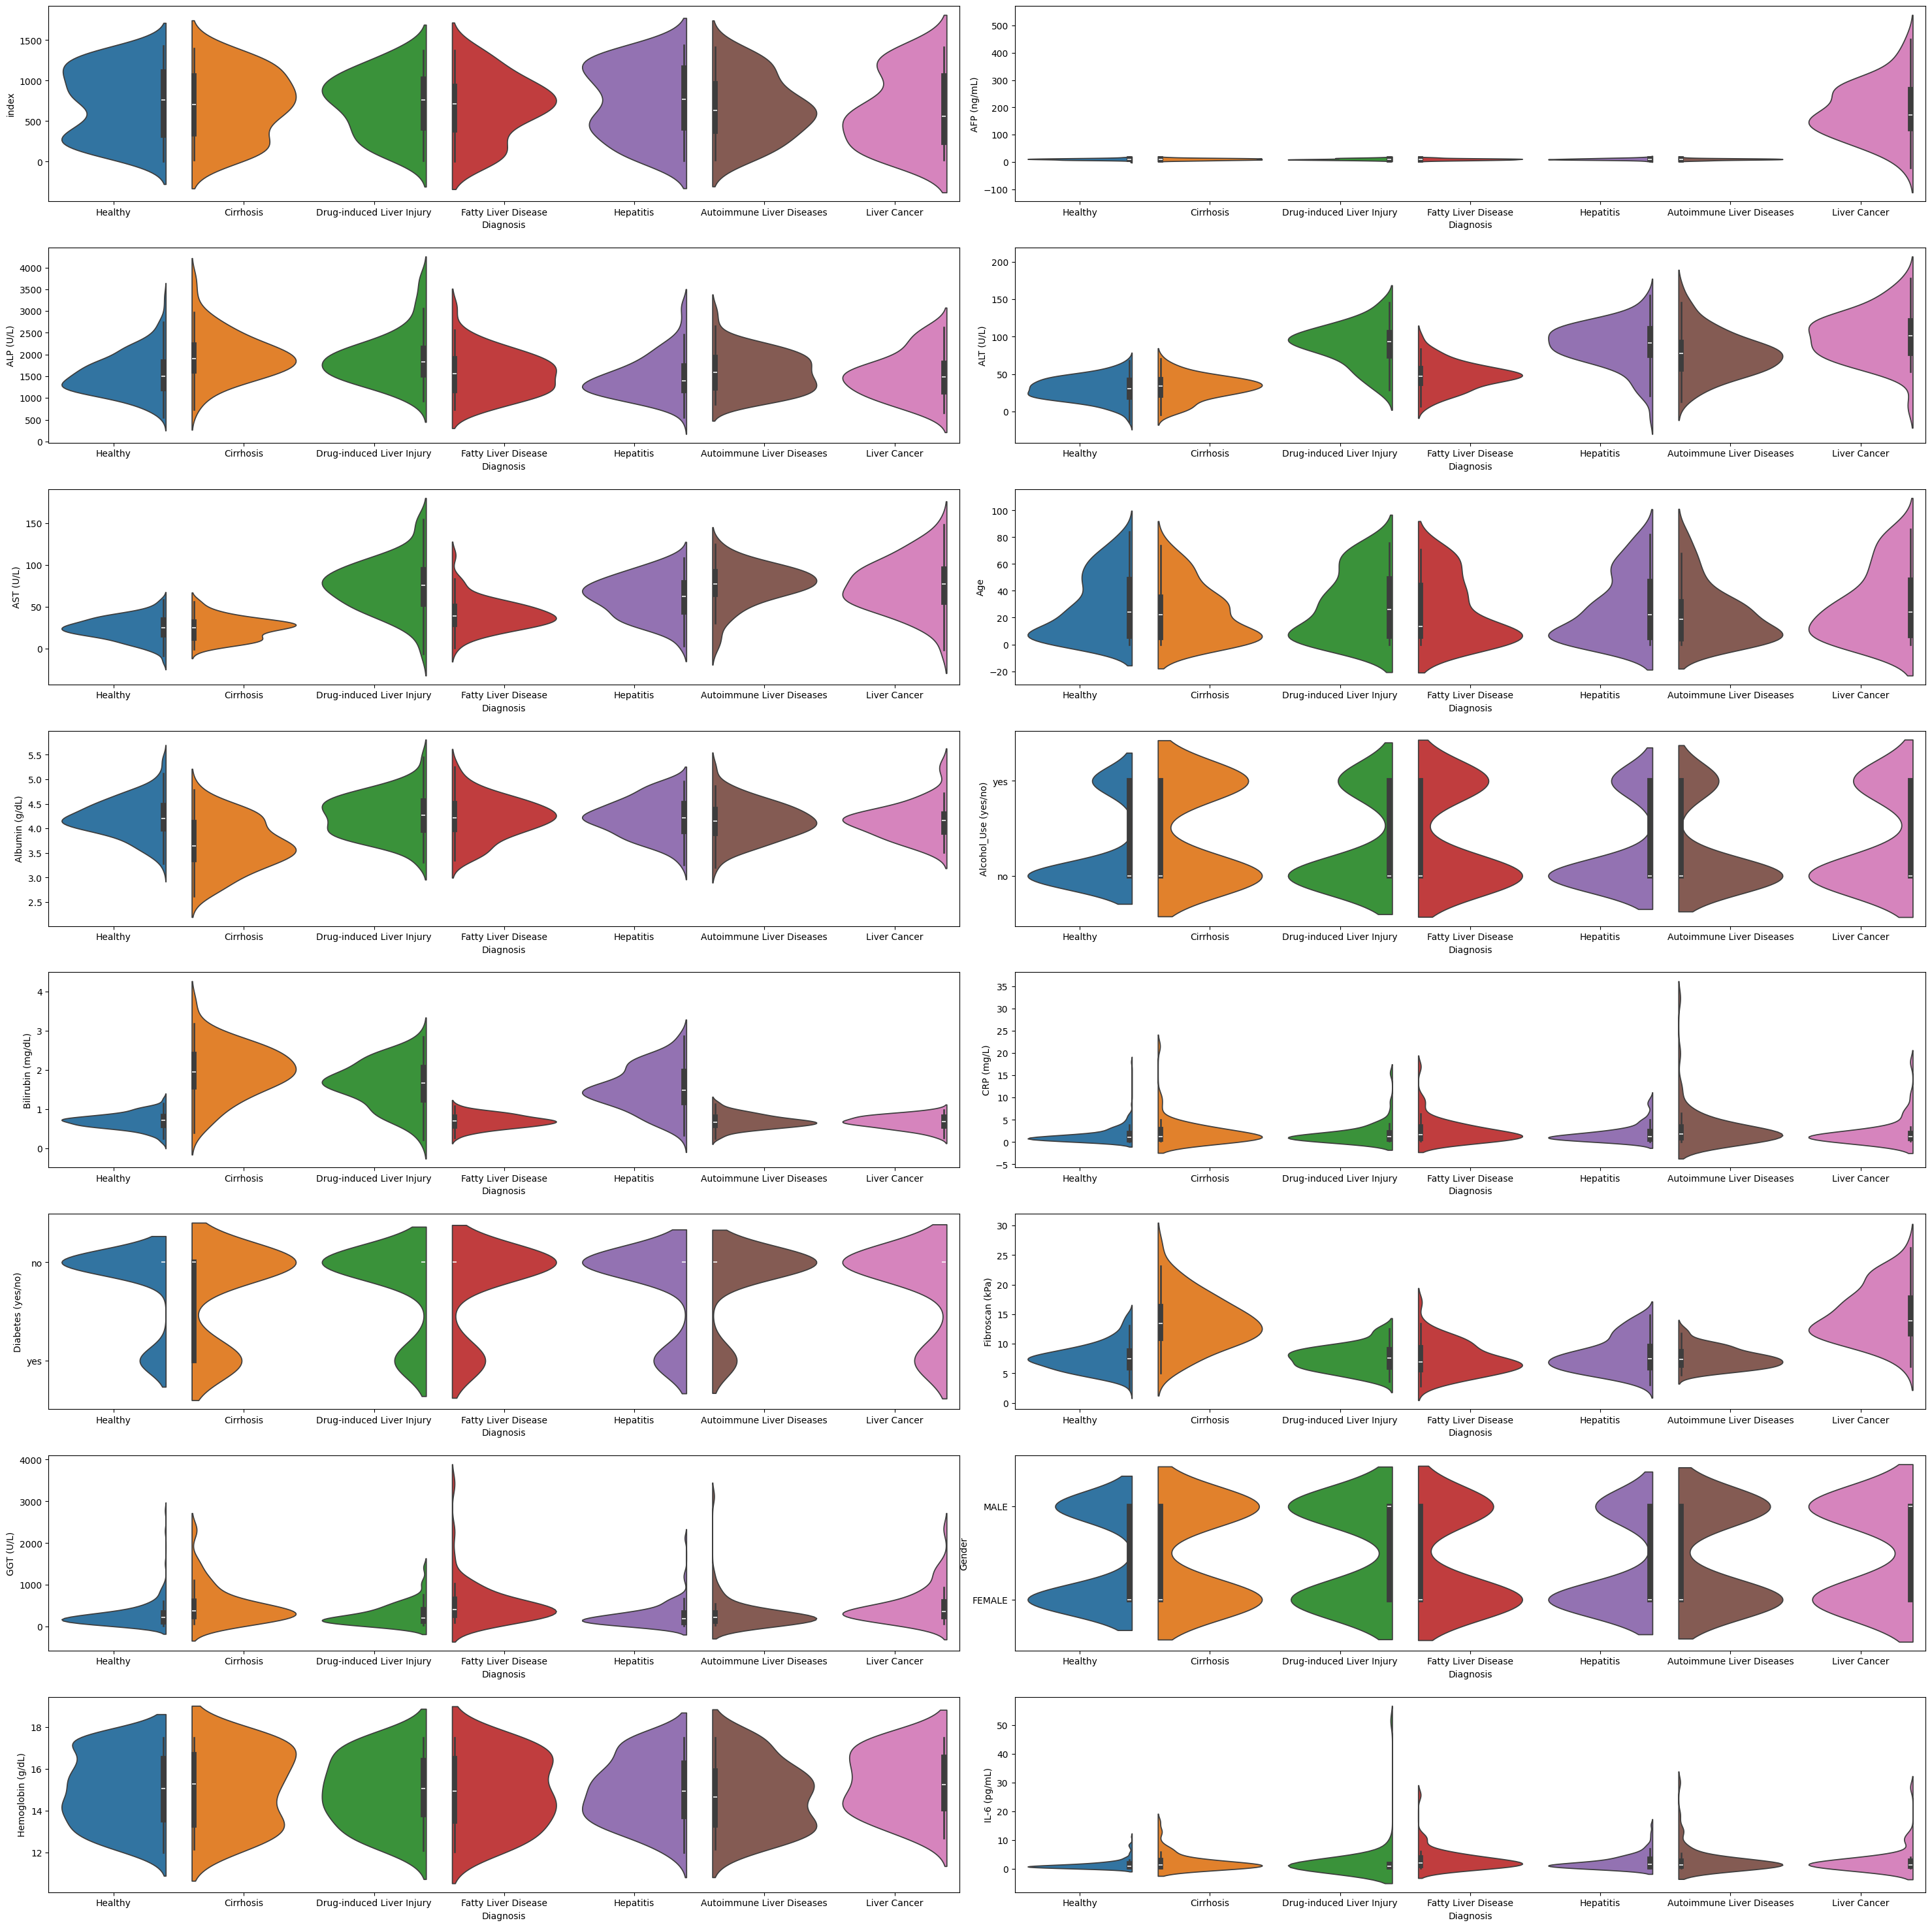

In [134]:
# violin plot
fig_violin, ax_violin = plt.subplots(nrows=8, ncols=2, figsize=(30,30))
plt.tight_layout(pad=3.0)

i = 0
for row in range(8):
    for col in range(2):
        sns.violinplot(ax=ax_violin[row, col], data=raw_train, x='Diagnosis', y=raw_train.columns[i], 
                       hue='Diagnosis', split=True) # the split makes it easier to see the differenvce for edible 1 or 0
        i += 1
        
plt.show()

In [135]:
print(raw_train.isnull().sum())
raw_train.shape

index                         0
AFP (ng/mL)                   0
ALP (U/L)                     0
ALT (U/L)                     0
AST (U/L)                     0
Age                           0
Albumin (g/dL)                0
Alcohol_Use (yes/no)          0
Bilirubin (mg/dL)             0
CRP (mg/L)                    0
Diabetes (yes/no)             0
Fibroscan (kPa)               0
GGT (U/L)                     0
Gender                        0
Hemoglobin (g/dL)             0
IL-6 (pg/mL)                  0
Obesity (yes/no)              0
PT/INR                        0
Platelets (10^9/L)            0
RBC (10^12/L)                 0
Serum_Ammonia (μmol/L)        0
Serum_Copper (μg/dL)          0
Serum_Creatinine (mg/dL)      0
Serum_Iron (μg/dL)            0
Serum_Lactate (mmol/L)        0
Serum_Urea (mg/dL)            0
Serum_Zinc (μg/dL)            0
TIBC (μg/dL)                  0
Transferrin_Saturation (%)    0
WBC (10^9/L)                  0
pH                            0
Diagnosi

(703, 32)

### Data cleaning

In [136]:
#df = pd.get_dummies(raw_train, drop_first=True)
#dummies_test = pd.get_dummies(test_data, drop_first=True)

In [137]:
#convert boolean values True to 1 and False to 0 
ohe = OneHotEncoder(drop='first', sparse_output=False)
for col in df.columns:
    if df[col].dtype == 'bool':
        reshaped_data = df[col].values.reshape(-1, 1) # Reshape the boolean column to a 2D array
        encoded_data = ohe.fit_transform(reshaped_data)
        encoded_df = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out([col]))
        df = pd.concat([df.drop([col], axis=1), encoded_df], axis=1) # Combine back into the original DataFrame

df


,index,AFP (ng/mL),ALP (U/L),ALT (U/L),AST (U/L),Age,Albumin (g/dL),Bilirubin (mg/dL),CRP (mg/L),Fibroscan (kPa),...,Diabetes (yes/no)_yes,Gender_MALE,Obesity (yes/no)_yes,Diagnosis_Cirrhosis,Diagnosis_Drug-induced Liver Injury,Diagnosis_Fatty Liver Disease,Diagnosis_Healthy,Diagnosis_Hepatitis,Diagnosis_Liver Cancer,Alcohol_Use (yes/no)_yes_True
0,1124.0,13.571425,1653.138489,40.405592,45.598427,4.0,4.477126,0.541997,1.002121,5.501881,...,False,True,True,False,False,False,True,False,False,1.0
2,530.0,10.898943,1557.369920,29.665496,16.044488,30.0,4.506351,0.740952,1.670375,6.961641,...,False,False,True,False,False,False,True,False,False,1.0
3,686.0,13.872275,1273.840525,142.418649,64.204257,0.0,3.665655,1.939879,1.220646,9.193268,...,False,True,False,False,True,False,False,False,False,0.0
4,296.0,10.102457,1461.622515,22.437303,23.940205,59.0,4.005109,0.769535,0.139863,11.827885,...,False,False,True,False,False,False,True,False,False,1.0
8,785.0,9.174636,1229.834674,27.789897,37.531030,3.0,4.359691,0.749890,3.311809,6.362329,...,False,True,False,False,False,False,True,False,False,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [138]:
# convert yes and no to 1 and 0
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])
df

,index,AFP (ng/mL),ALP (U/L),ALT (U/L),AST (U/L),Age,Albumin (g/dL),Bilirubin (mg/dL),CRP (mg/L),Fibroscan (kPa),...,Diabetes (yes/no)_yes,Gender_MALE,Obesity (yes/no)_yes,Diagnosis_Cirrhosis,Diagnosis_Drug-induced Liver Injury,Diagnosis_Fatty Liver Disease,Diagnosis_Healthy,Diagnosis_Hepatitis,Diagnosis_Liver Cancer,Alcohol_Use (yes/no)_yes_True
0,1124.0,13.571425,1653.138489,40.405592,45.598427,4.0,4.477126,0.541997,1.002121,5.501881,...,0,1,1,0,0,0,1,0,0,1.0
2,530.0,10.898943,1557.369920,29.665496,16.044488,30.0,4.506351,0.740952,1.670375,6.961641,...,0,0,1,0,0,0,1,0,0,1.0
3,686.0,13.872275,1273.840525,142.418649,64.204257,0.0,3.665655,1.939879,1.220646,9.193268,...,0,1,0,0,1,0,0,0,0,0.0
4,296.0,10.102457,1461.622515,22.437303,23.940205,59.0,4.005109,0.769535,0.139863,11.827885,...,0,0,1,0,0,0,1,0,0,1.0
8,785.0,9.174636,1229.834674,27.789897,37.531030,3.0,4.359691,0.749890,3.311809,6.362329,...,0,1,0,0,0,0,1,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2,2,1,2,1,2,2,1,0.0
367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2,2,1,2,1,2,2,1,0.0
368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2,2,1,2,1,2,2,1,0.0
370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2,2,1,2,1,2,2,1,0.0


In [139]:
# Using Z-scores to filter out the outliers. Z-score < |3|
print(f'Shape of dataset before removing outliers{df.shape}')
z_scores = stats.zscore(df) # calculates z score
abs_z_scores = np.abs(z_scores)
not_outliers = (abs_z_scores < 3).all(axis=1)
cleaned = raw_train[not_outliers]
print(f'Shape of dataset after removing outliers {cleaned.shape}')

Shape of dataset before removing outliers(542, 37)


/var/folders/qf/9lcflp0s1nq8l85_tw03dz180000gp/T/ipykernel_22596/25468592.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned = raw_train[not_outliers]


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [ ]:
df = pd.concat([cleaned.drop(['Diagnosis'], axis=1), cleaned], axis=1)
df

KeyError: "['Diagnosis'] not found in axis"

### Data preprocessing and visualisation after cleaning


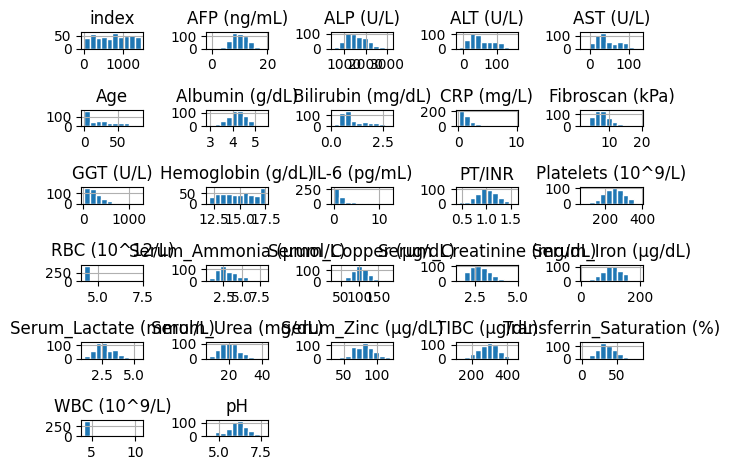

In [ ]:
# Histogram after cleaning
cleaned.hist(edgecolor="white") # edgecolor makes it look nicer 
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

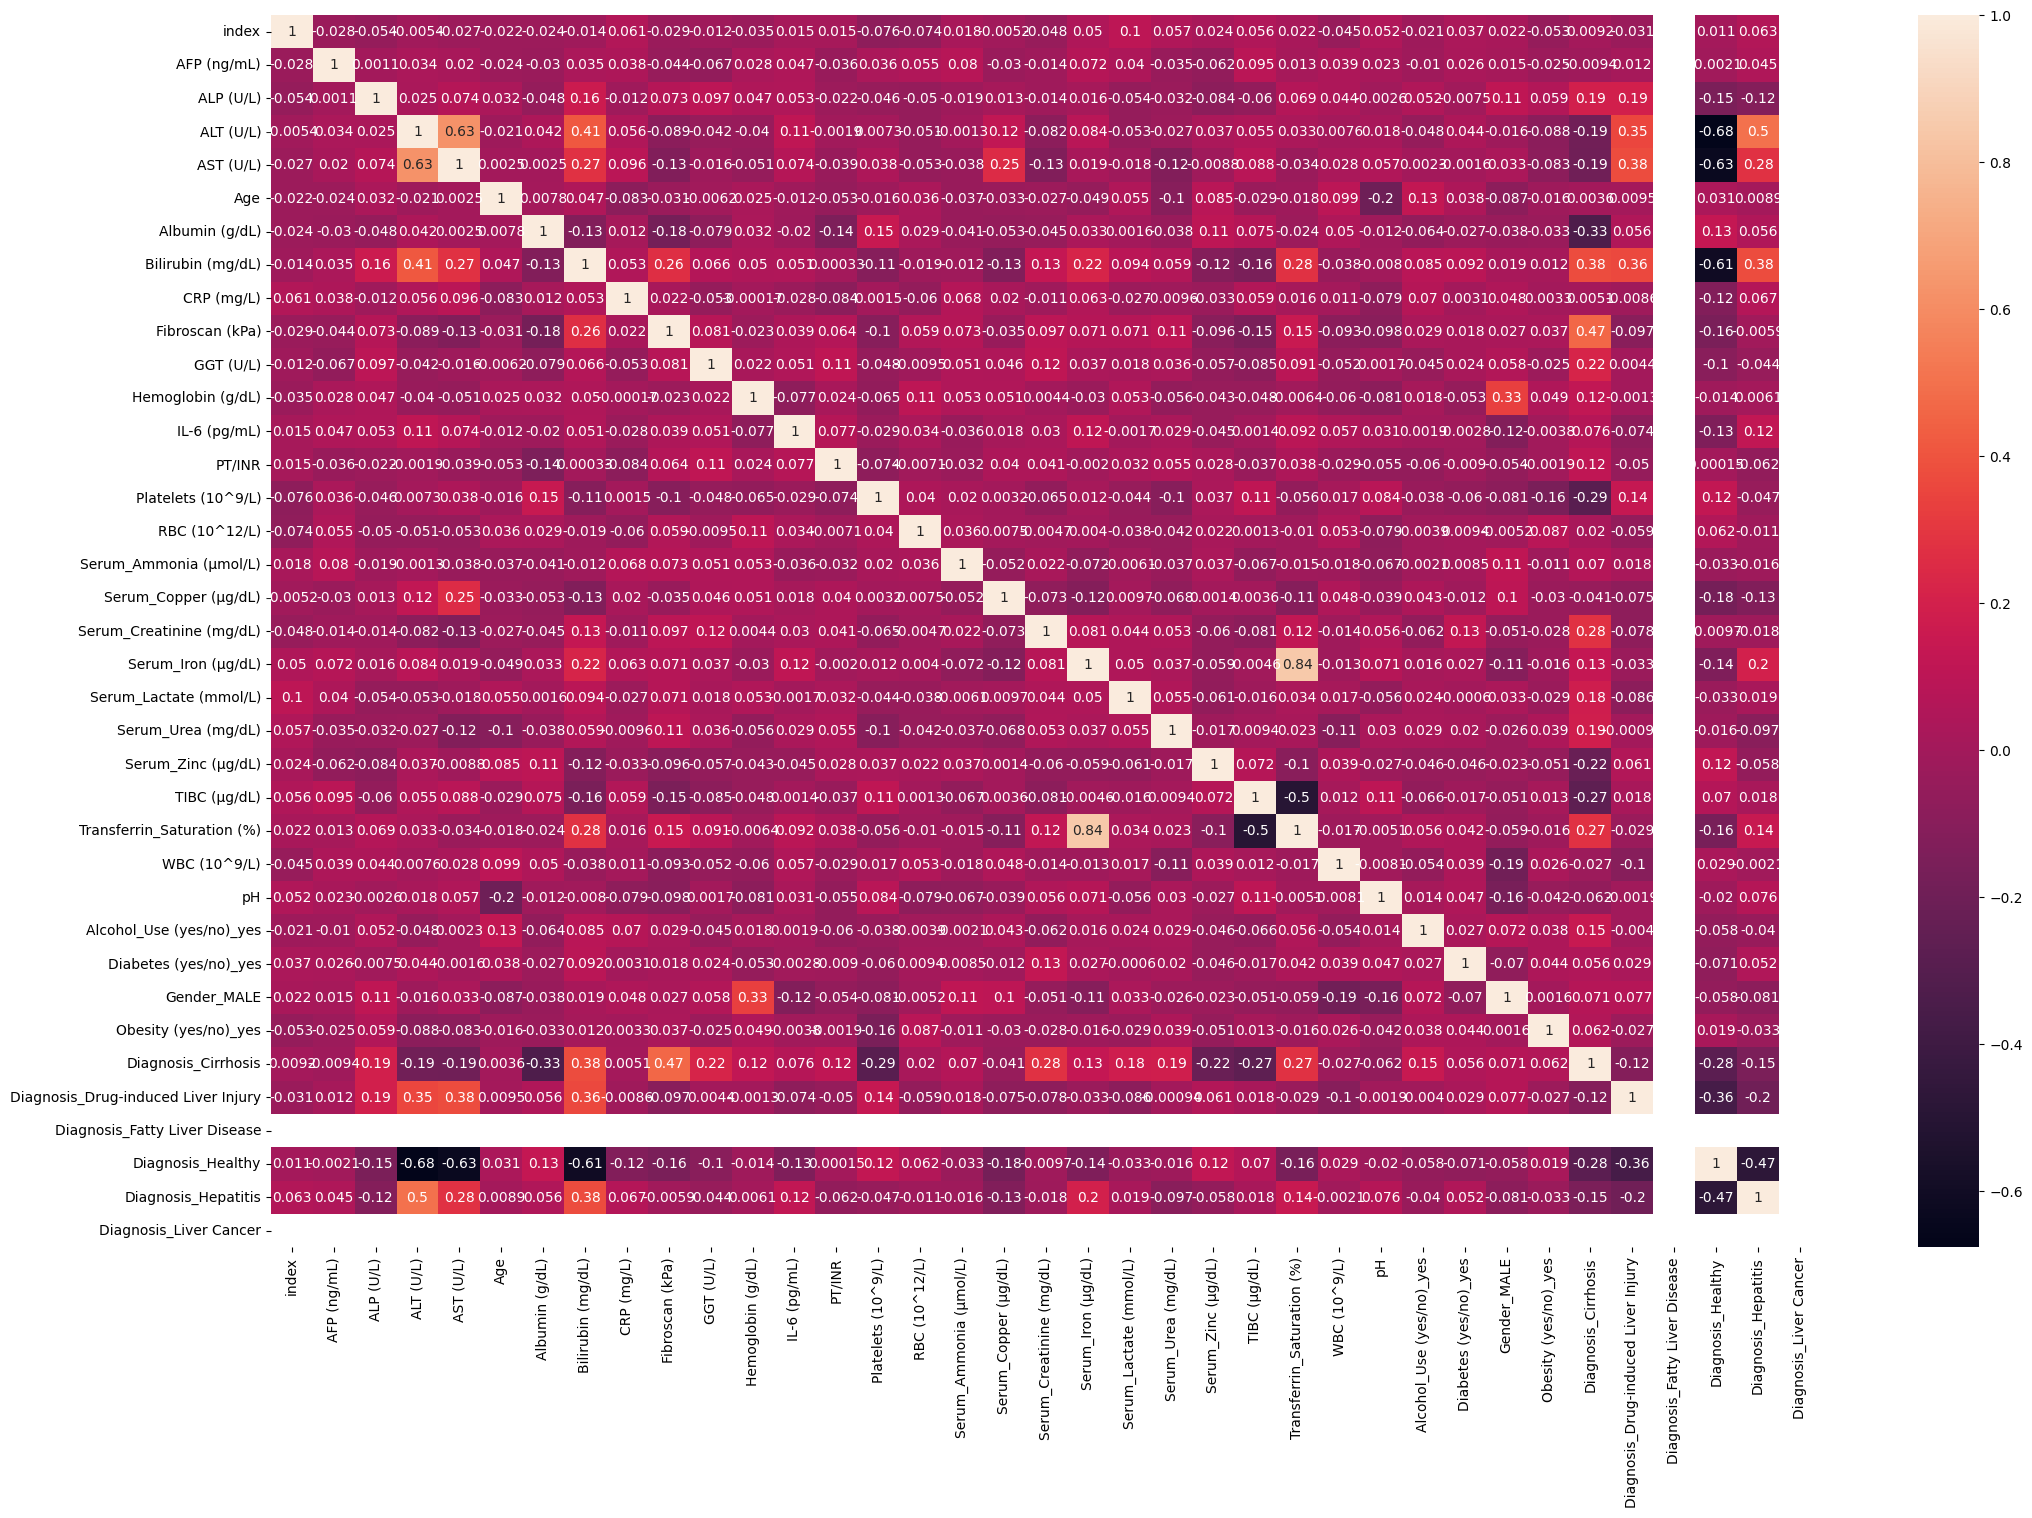

In [ ]:
# Correlation Matrix 
corr_matrix = cleaned.corr()
fig_corr, ax_corr = plt.subplots(figsize=(25,16))
sns.heatmap(data=corr_matrix,annot=True, ax=ax_corr)
plt.show

In [ ]:
X = raw_train.drop(["Diagnosis"], axis=1) # contains all columns except traget colum Edible 
y = raw_train["Diagnosis"] # only contains the traget colum Edible

In [ ]:
raw_data = pd.get_dummies(raw_train, drop_first=True)
test_data = pd.get_dummies(test_data, drop_first=True)


cleaned_df = pd.DataFrame(data=raw_data, columns=raw_data.columns)

cleaned_df.head() # Checking if the imputer worked

,index,AFP (ng/mL),ALP (U/L),ALT (U/L),AST (U/L),Age,Albumin (g/dL),Bilirubin (mg/dL),CRP (mg/L),Fibroscan (kPa),...,Alcohol_Use (yes/no)_yes,Diabetes (yes/no)_yes,Gender_MALE,Obesity (yes/no)_yes,Diagnosis_Cirrhosis,Diagnosis_Drug-induced Liver Injury,Diagnosis_Fatty Liver Disease,Diagnosis_Healthy,Diagnosis_Hepatitis,Diagnosis_Liver Cancer
0,1124,13.571425,1653.138489,40.405592,45.598427,4,4.477126,0.541997,1.002121,5.501881,...,True,False,True,True,False,False,False,True,False,False
1,1188,13.649342,1940.518305,21.336986,34.064095,55,3.190724,1.199063,0.582746,13.902151,...,True,False,True,True,True,False,False,False,False,False
2,530,10.898943,1557.369920,29.665496,16.044488,30,4.506351,0.740952,1.670375,6.961641,...,False,False,False,True,False,False,False,True,False,False
3,686,13.872275,1273.840525,142.418649,64.204257,0,3.665655,1.939879,1.220646,9.193268,...,True,False,True,False,False,True,False,False,False,False
4,296,10.102457,1461.622515,22.437303,23.940205,59,4.005109,0.769535,0.139863,11.827885,...,False,False,False,True,False,False,False,True,False,False


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

X_train:  (421, 31)
X_test:  (282, 31)
y_train:  (421,)
y_test:  (282,)


### Modelling

### Final evaluation

### Kaggle submission